# Happy Pictures

The goal is to classify pictures of people into happy, not happy.

In [10]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

The input data is pictures of some people, taken by a front-door camera. The labels indicate if the pictures are happy or not happy


<img src="images/house-members.png" style="width:550px;height:250px;">

First, we normalize the dataset and display its shapes.

In [11]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures



## 2 - Building a model in Keras

Here is the basic outline of the model the follows

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```


**Note**: We need to be careful with your data's shapes. We need to make sure our convolutional, pooling and fully-connected layers are adapted to the volumes we're applying it to.

In [12]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    

    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
     # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1', padding="same")(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    
    return model

We follow the following steps :
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`


In [13]:
happyModel = HappyModel(X_train[0].shape)


Step 2, compile the model

In [14]:
happyModel.compile(optimizer='Adam',loss='binary_crossentropy', metrics=["accuracy"])


Step 3, train the model. Choose the number of epochs and the batch size.

In [ ]:
happyModel.fit(x=X_train,y=Y_train, batch_size=20, epochs=20)



Epoch 1/20
600/600 [==============================] - 21s 34ms/step - loss: 0.4856 - acc: 0.8017
Epoch 2/20
600/600 [==============================] - 22s 36ms/step - loss: 0.2233 - acc: 0.9050
Epoch 3/20
600/600 [==============================] - 20s 33ms/step - loss: 0.1884 - acc: 0.9250
Epoch 4/20
600/600 [==============================] - 22s 37ms/step - loss: 0.0946 - acc: 0.9783
Epoch 5/20
600/600 [==============================] - 19s 31ms/step - loss: 0.0989 - acc: 0.9683
Epoch 6/20
600/600 [==============================] - 19s 31ms/step - loss: 0.0785 - acc: 0.9750
Epoch 7/20
600/600 [==============================] - 19s 31ms/step - loss: 0.0888 - acc: 0.9683
Epoch 8/20
600/600 [==============================] - 21s 35ms/step - loss: 0.0920 - acc: 0.9617
Epoch 9/20
600/600 [==============================] - 18s 30ms/step - loss: 0.0500 - acc: 0.9900
Epoch 10/20
600/600 [==============================] - 16s 26ms/step - loss: 0.0635 - acc: 0.9800
Epoch 11/20
600/600 [========

Note that if you run `fit()` again, the `model` will continue to train with the parameters it has already learnt instead of reinitializing them.

**Exercise**: Implement step 4, i.e. test/evaluate the model.

In [9]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(x=X_test,y=Y_test, batch_size=20)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 2s 12ms/step

Loss = 0.13944817533095677
Test Accuracy = 0.9599999904632568


## 5 - Model Summary

- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.


In [8]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        50208     
__________

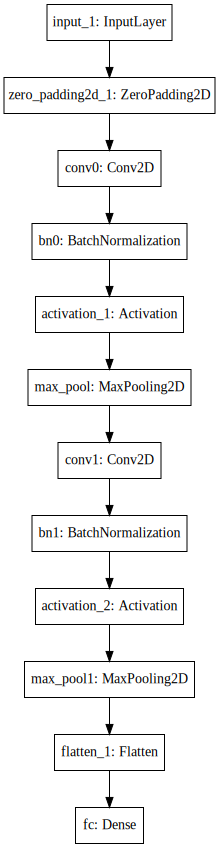

In [10]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))